In [1]:
#repeated measures example
import pandas as pd
# load data file
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['W1', 'W2', 'W3', 'W4', 'W5'])
# replace column names
df_melt.columns = ['Id', 'time_points', 'leaves']
df_melt.head(2)

,Id,time_points,leaves
0,P1,W1,4
1,P2,W1,3


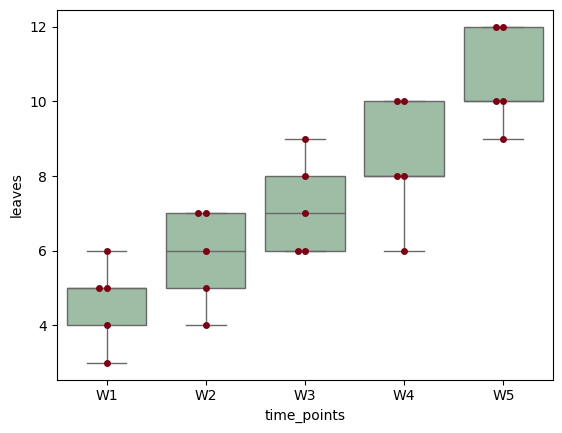

In [2]:
# generate a boxplot to see the data distribution by time points. Using boxplot, we can
# boxplot helps detect the differences between different time points and find any outliers
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='time_points', y='leaves', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="time_points", y="leaves", data=df_melt, color='#7d0013')
plt.show()

In [3]:
!pip install pingouin
import pingouin as pg
res = pg.rm_anova(dv='leaves', within='time_points', subject='Id', data=df_melt, detailed=True)
res

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.9 MB/s eta 0:00:00


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,time_points,108.24,4,27.060,146.27027,2.214820e-12,0.744224,0.541964
1,Error,2.96,16,0.185,NaN,NaN,NaN,NaN


In [4]:
#post hoc tests: paired t-tests with FDR-BH corrections
post_hocs = pg.pairwise_ttests(dv='leaves', within='time_points', subject='Id', padjust='fdr_bh', data=df_melt)
post_hocs

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,time_points,W1,W2,True,True,-6.000000,4.0,two-sided,0.003883,0.004853,fdr_bh,13.991,-0.884977
1,time_points,W1,W3,True,True,-10.614456,4.0,two-sided,0.000446,0.000743,fdr_bh,68.116,-1.917450
2,time_points,W1,W4,True,True,-10.155927,4.0,two-sided,0.000529,0.000756,fdr_bh,60.047,-2.397193
3,time_points,W1,W5,True,True,-18.973666,4.0,two-sided,0.000045,0.000227,fdr_bh,369.333,-4.352931
4,time_points,W2,W3,True,True,-5.715476,4.0,two-sided,0.004636,0.005151,fdr_bh,12.3,-0.969840
5,time_points,W2,W4,True,True,-10.614456,4.0,two-sided,0.000446,0.000743,fdr_bh,68.116,-1.565591
6,time_points,W2,W5,True,True,-24.000000,4.0,two-sided,0.000018,0.000179,fdr_bh,740.006,-3.277318
7,time_points,W3,W4,True,True,-3.207135,4.0,two-sided,0.032678,0.032678,fdr_bh,3.006,-0.722581
8,time_points,W3,W5,True,True,-13.880442,4.0,two-sided,0.000156,0.000521,fdr_bh,147.775,-2.321433
9,time_points,W4,W5,True,True,-11.000000,4.0,two-sided,0.000388,0.000743,fdr_bh,75.445,-1.310253


In [5]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df_melt, dv='leaves', subject='Id', within='time_points')[-1]

0.8883022484983506

In [6]:
#test of normality
pg.normality(data=df_melt, dv='leaves', group='time_points')

,W,pval,normal
time_points,,,
W1,0.960859,0.813952,True
W2,0.902020,0.421149,True
W3,0.902020,0.421149,True
W4,0.881038,0.314040,True
W5,0.851907,0.200623,True


In [7]:
#example 2
# This is to print in markdown style
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Read database locally
#df = pd.read_csv('../data/BG-db.csv',index_col=0)

# Read dataset from url:
import io
import requests
url="https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0)


df.columns=['before','during','after']
df.index.name='Subject'
df.head(10)

,before,during,after
Subject,,,
0,89.162573,94.023517,94.594145
1,90.857629,95.273755,95.040646
2,94.912999,96.612870,95.200472
3,95.254064,96.818673,97.205801
4,97.136291,97.760342,98.428840
5,99.809999,99.169227,98.867769
6,101.094087,99.579283,99.790581
7,101.531428,99.661758,100.669928
8,101.981148,100.812359,101.751155


<ipython-input-8-fee582d50c27>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(A,bins=bins,label='Before treatment')
<ipython-input-8-fee582d50c27>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(B,bins=bins,label='During treatment')
<ipython-input-8-fee582d50c27>:18: UserWarning

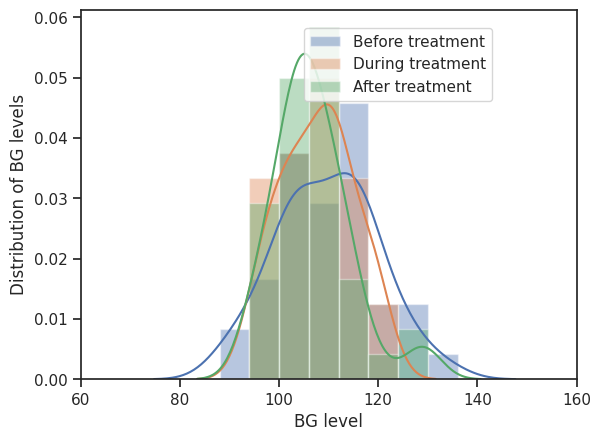

In [8]:
import numpy as np
import matplotlib as plt
%matplotlib inline

sns.set(style="ticks")


bins = np.arange(70,150,6)

A = df['before'].values
B = df['during'].values
C = df['after'].values


# Show the results of a linear regression within each dataset
ax1 = sns.distplot(A,bins=bins,label='Before treatment')
ax2 = sns.distplot(B,bins=bins,label='During treatment')
ax3 = sns.distplot(C,bins=bins,label='After treatment')


plt.pyplot.xlabel('BG level')
plt.pyplot.ylabel('Distribution of BG levels')
plt.pyplot.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)

plt.pyplot.xlim((60,160))
plt.pyplot.show()

In [9]:
# Calculate means for each group
mu1 = df['before'].values.mean()
mu2 = df['during'].values.mean()
mu3 = df['after'].values.mean()

#Grand mean
mu = df.values.mean()

printmd('$\overline{{x}}_1 = {}$'.format(round(mu1,3)))
printmd('$\overline{{x}}_2 = {}$'.format(round(mu2,3)))
printmd('$\overline{{x}}_3 = {}$'.format(round(mu3,3)))
printmd('$\overline{{x}} = {}$'.format(round(mu,3)))

# Number of samples for each group:
n = len(df)
# Here the number of samples is the same for all groups:
n1 = n
n2 = n
n3 = n

# SS groups:
SSgroups= n1*(mu1-mu)**2 + n2*(mu2-mu)**2 + n3*(mu3-mu)**2
printmd("$SS_{{groups}} = {}$".format(round(SSgroups,3)))

$\overline{x}_1 = 109.727$

$\overline{x}_2 = 107.706$

$\overline{x}_3 = 106.735$

$\overline{x} = 108.056$

$SS_{groups} = 186.374$

In [10]:
# Group 1 is a column of the dataset (Before):
group1 = df['before'].values
# Take mean value for this group
mu1 = group1.mean()
# Now calculate sum (x - mu1)^2 for all x values in this group:
ss_group1 = np.sum((group1-mu1)**2)
printmd('SS for group 1 ={}'.format(ss_group1))

SS for group 1 =3903.5222013833722

In [11]:
group2 = df['during'].values
# Take mean value for this group
mu2 = group2.mean()
# Now calculate sum (x - mu1)^2 for all x values in this group:
ss_group2 = np.sum((group2-mu2)**2)
printmd('SS for group 2 ={}'.format(ss_group2))
#
group3 = df['after'].values
# Take mean value for this group
mu3 = group3.mean()
# Now calculate sum (x - mu1)^2 for all x values in this group:
ss_group3 = np.sum((group3-mu3)**2)
printmd('SS for group 3 ={}'.format(ss_group3))
#
SSw = ss_group1 + ss_group2 + ss_group3
printmd('$SS_w = {}$'.format(round(SSw,3)))

SS for group 2 =2110.5666278081508

SS for group 3 =2325.003022145577

$SS_w = 8339.092$

In [12]:
# Let's calculate the subject means, i.e., the means for each row in our dataframe

def subject_mean(a,b,c):
    '''Returns mean value of 3 numbers'''
    return float((a+b+c)/3.0)

df['Subject means'] = df.apply(lambda row: subject_mean(row['before'],row['during'],row['after']), axis = 1)
df.head()

,before,during,after,Subject means
Subject,,,,
0,89.162573,94.023517,94.594145,92.593412
1,90.857629,95.273755,95.040646,93.724010
2,94.912999,96.612870,95.200472,95.575447
3,95.254064,96.818673,97.205801,96.426179
4,97.136291,97.760342,98.428840,97.775158


In [13]:


k=3.0
subject_means = df['Subject means'].values
SSsubjects = k * np.sum( (subject_means - mu)**2 )

printmd('$SS_{{subjects}} = {}$'.format(round(SSsubjects,3)))



$SS_{subjects} = 7996.418$

In [14]:
SSerror = SSw - SSsubjects
printmd('$SS_{{error}} = {}$'.format(round(SSerror,3)))

$SS_{error} = 342.674$

In [15]:
# Degrees of freedom for groups:
df1 = k-1
# Degrees of freedom for error
df2 = (n-1)*(k-1)

MSgroups = SSgroups/df1

MSerror = SSerror/df2

Fstatistic = MSgroups/MSerror

printmd('$MS_{{groups}} = {}$'.format(round(MSgroups,3)))
printmd('$MS_{{error}} = {}$'.format(round(MSerror,3)))
printmd('$F$-statistic $= {}$'.format(round(Fstatistic,3)))
printmd('DF1 = {}, DF2 = {}'.format(int(df1),int(df2)))

$MS_{groups} = 93.187$

$MS_{error} = 4.393$

$F$-statistic $= 21.211$

DF1 = 2, DF2 = 78

In [16]:
#example 3: mixed anova
# Let's assume that we have a balanced design with 30 students in each group
n = 30
months = ['August', 'January', 'June']

# Generate random data
np.random.seed(1234)
control = np.random.normal(5.5, size=len(months) * n)
meditation = np.r_[ np.random.normal(5.4, size=n),
                    np.random.normal(5.8, size=n),
                    np.random.normal(6.4, size=n) ]

# Create a dataframe
df = pd.DataFrame({'Scores': np.r_[control, meditation],
                   'Time': np.r_[np.repeat(months, n), np.repeat(months, n)],
                   'Group': np.repeat(['Control', 'Meditation'], len(months) * n),
                   'Subject': np.r_[np.tile(np.arange(n), 3),
                                    np.tile(np.arange(n, n + n), 3)]})

In [17]:
df.head()

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4


<ipython-input-18-dd2628b01f8c>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True, markers=['o', 's'],


<Axes: xlabel='Time', ylabel='Scores'>

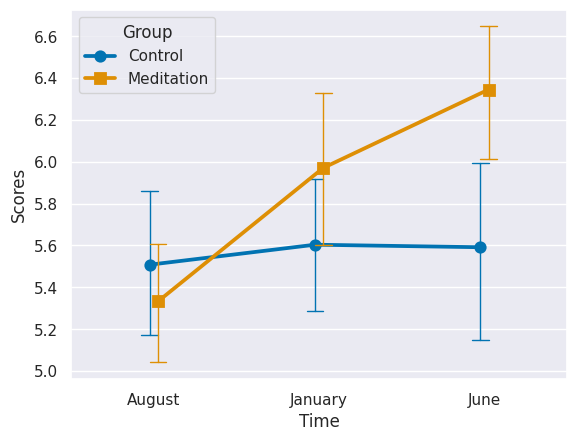

In [18]:
sns.set()
sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [19]:
df.groupby(['Time', 'Group'])['Scores'].agg(['mean', 'std']).round(2)

mean   std
Time    Group                 
August  Control     5.51  1.03
        Meditation  5.33  0.81
January Control     5.60  0.90
        Meditation  5.97  1.07
June    Control     5.59  1.18
        Meditation  6.35  0.93

In [20]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        4.465      1     58  4.465  4.131    0.047  0.066  nan
Time         9.359      2    116  4.679  4.941    0.009  0.078    0.998
Interaction  6.539      2    116  3.270  3.452    0.035  0.056  nan



In [21]:
posthocs = pg.pairwise_ttests(dv='Scores', within='Time', between='Group',
                              subject='Subject', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast      Time     A        B           Paired    Parametric         T     dof  alternative      p-unc    BF10    hedges
------------  -------  -------  ----------  --------  ------------  ------  ------  -------------  -------  ------  --------
Time          -        August   January     True      True          -2.002  59.000  two-sided        0.050   0.908    -0.379
Time          -        August   June        True      True          -2.985  59.000  two-sided        0.004   7.594    -0.530
Time          -        January  June        True      True          -1.024  59.000  two-sided        0.310   0.232    -0.170
Group         -        Control  Meditation  False     True          -2.033  58.000  two-sided        0.047   1.447    -0.518
Time * Group  August   Control  Meditation  False     True           0.733  58.000  two-sided        0.466   0.329     0.187
Time * Group  January  Control  Meditation  False     True          -1.434  58.000  two-sided        0.157  

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [22]:
# statistical power for t-tests
# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

#calculation of effect size
# size of samples in pilot study
n1, n2 = 4, 4

# variance of samples in pilot study
s1, s2 = 5**2, 5**2

# calculate the pooled standard deviation
# (Cohen's d)
s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# means of the samples
u1, u2 = 90, 85

# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')

# factors for power analysis
alpha = 0.05
power = 0.8

# perform power analysis to find sample size
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power,
					ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))


Effect size: 1.0
Sample size/Number needed in each group: 16.715


In [23]:
# calculate the power directly
from statsmodels.stats.power import TTestPower


power = TTestPower()
n_test = power.solve_power(nobs=40, effect_size = 0.5,
						power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))


Power: 0.869


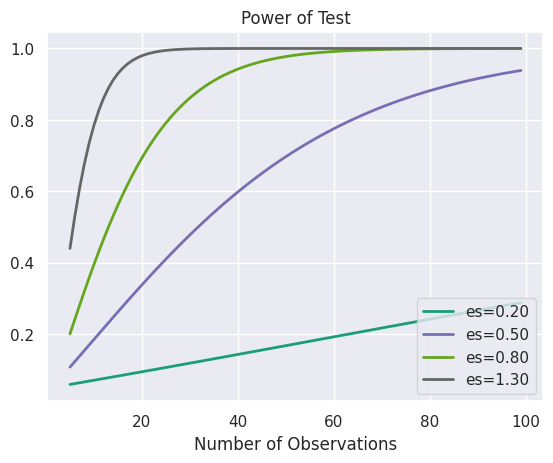

In [24]:
#power curves
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower


# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()


In [25]:
#NHANES dataset example
!pip install nhanes
import numpy as np
import pandas as pd

np.random.seed(12345)

from nhanes.load import load_NHANES_data

nhanes_data = load_NHANES_data()
adult_nhanes_data = nhanes_data.query('AgeInYearsAtScreening > 18')
adult_nhanes_data = adult_nhanes_data.dropna(subset=['WeightKg']).rename(columns={'WeightKg': 'Weight'})

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [26]:

import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size

63.765611775409525

<ipython-input-27-260c905bb918>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


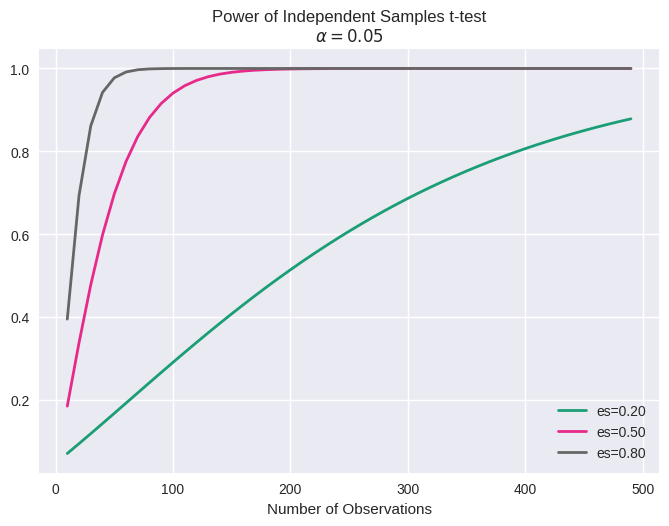

In [27]:
#+
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(10, 500, 10))

plt.style.use('seaborn')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig = power_analysis.plot_power(
    dep_var='nobs', nobs=sample_sizes,
    effect_size=effect_sizes, alpha=0.05, ax=ax,
    title='Power of Independent Samples t-test\n$\\alpha = 0.05$')

#-

In [28]:
#simulating:
#+
num_runs = 5000
effectSize = 0.5

# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=0.8, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int64(np.ceil(sampleSize))

# create a function that will generate samples and test for
# a difference between groups using a two-sample t-test


def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """

    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.ttest_ind(group1, group2)
    return(ttresult.pvalue)


# create input data frame for output
power_sim_results = pd.DataFrame({'p_value': np.zeros(num_runs)})

for run in range(num_runs):
    power_sim_results.loc[run, 'p_value'] = get_t_result(sampleSize, effectSize)


p_reject = np.mean(power_sim_results['p_value'] < 0.05)
p_reject
#-

0.7994